# Set Up & Importing

In [4]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
# Ensure 'path' is defined
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

for file_or_folder in os.listdir(path):
    print(file_or_folder)

csv_file_name = "Sample - Superstore.csv"
full_csv_path = os.path.join(path, csv_file_name)
print(f"\nCSV is: {full_csv_path}")

df = pd.read_csv(full_csv_path, encoding='latin1')
print("DataFrame loaded successfully with 'latin1' encoding!")

superstore-dataset-final
Sample - Superstore.csv

CSV is: /Users/thienquan/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1/Sample - Superstore.csv
DataFrame loaded successfully with 'latin1' encoding!


In [6]:
# Convert Order Date to datetime first
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
df['Day']=df['Order Date'].dt.day

# Quick Readthrough

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Geographical Analysis

Axes(0.125,0.11;0.775x0.77)


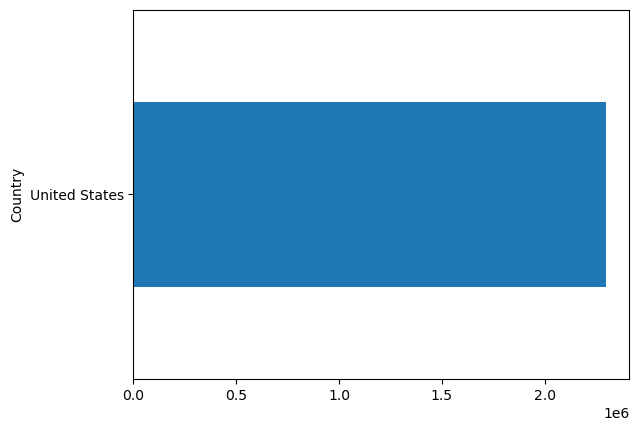

In [9]:
sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending = False).head(20).plot.barh();
print(sales_by_country)

### Sales Data are in US only

# What is the best state in term of sales and profit?

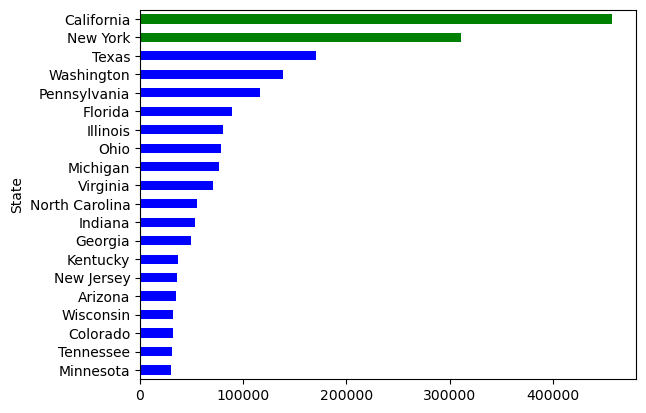

In [10]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','green','green']
df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

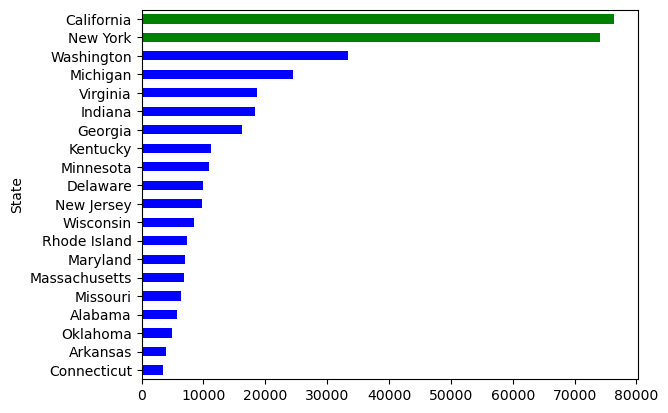

In [11]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','green','green']
df.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

### Finding: In both sales and profit, California and New York are top 2 states. California has a significant larger sales, but slightly more profit than New York

## Are there any difference among states in profitability?


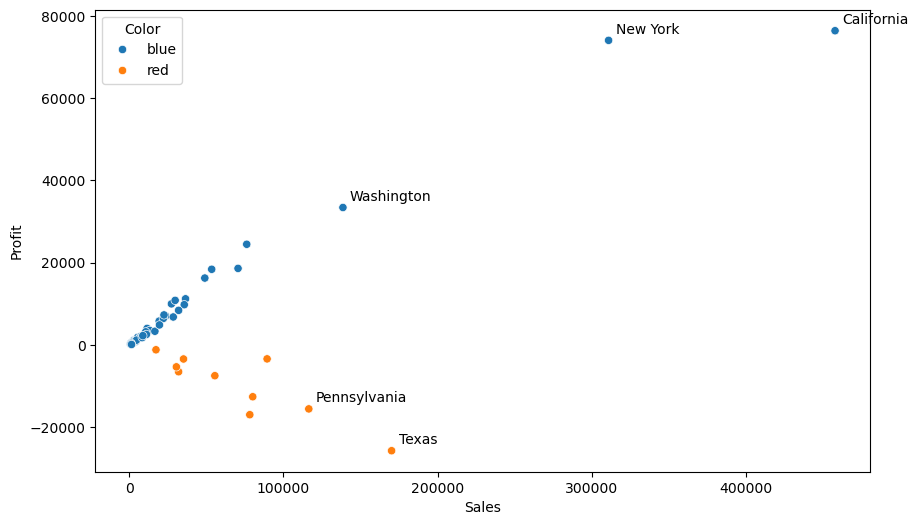

In [45]:
df_state=pd.DataFrame(df.groupby('State')['Sales'].sum())
df_state['Profit']=pd.DataFrame(df.groupby('State')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'blue'

df_state.loc[:,'Color']=df_state.loc[:,'Profit'].apply(type)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_state, hue='Color', x='Sales', y='Profit')

# Add annotations for top 5 states
top_5_states = df_state.nlargest(5, 'Sales')
for idx, row in top_5_states.iterrows():
    plt.annotate(idx, 
                (row['Sales'], row['Profit']),
                xytext=(5, 5),
                textcoords='offset points')

plt.show()

### Finding: We need to focus on analyzing cities with high sales but negative profitability such Texas and Pennsylvania

# What is the best City in sales and profit

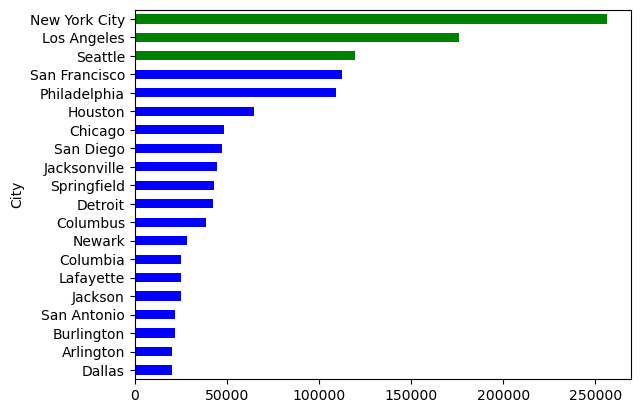

In [14]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','green','green','green']
df.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

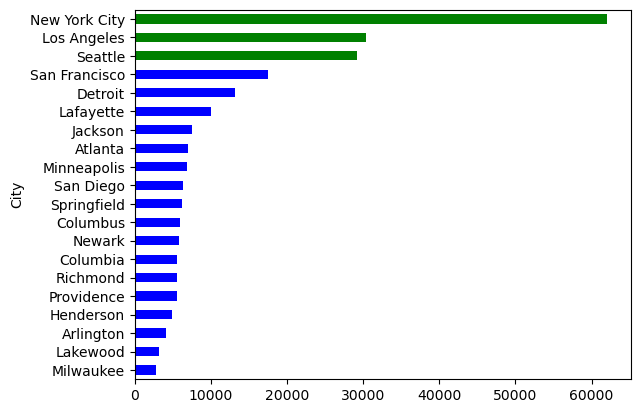

In [15]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','green','green','green']
df.groupby('City')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

### Top 3 cities for profit are Seattle, Los Angeles and New York City. New York has the highest profit, followed by Los Angeles and Seattle .

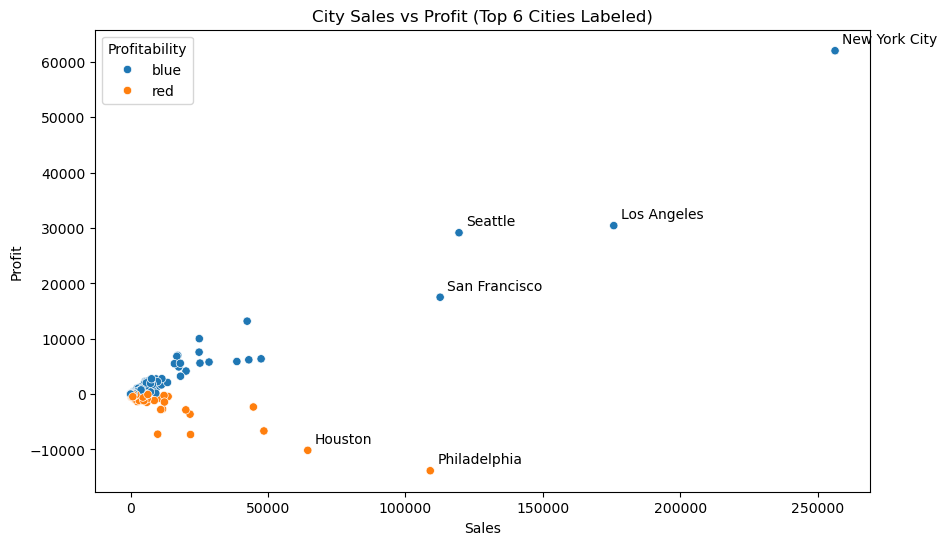

In [46]:
df_city=pd.DataFrame(df.groupby('City')['Sales'].sum())
df_city['Profit']=pd.DataFrame(df.groupby('City')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'blue'

df_city.loc[:,'Profitability']=df_city.loc[:,'Profit'].apply(type)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_city, hue='Profitability', x='Sales', y='Profit')

# Add annotations for top 6 cities
top_6_cities = df_city.nlargest(6, 'Sales')
for idx, row in top_6_cities.iterrows():
    plt.annotate(idx, 
                (row['Sales'], row['Profit']),
                xytext=(5, 5),
                textcoords='offset points')

plt.title('City Sales vs Profit (Top 6 Cities Labeled)')
plt.show()

### Finding: We need to focus turning Philadelphia toward profitability as the city have potential due to its high sale.

## Insight on Customer

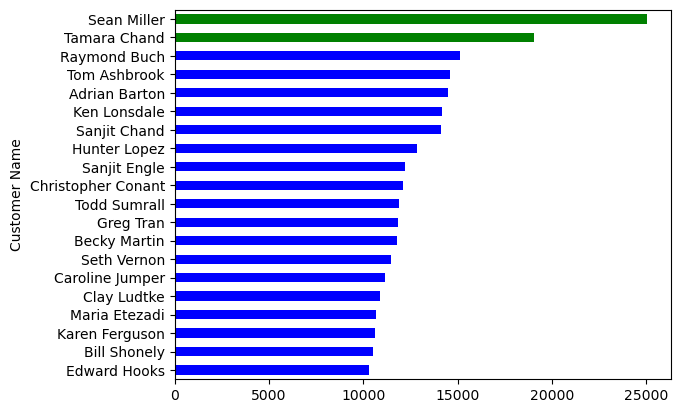

In [18]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','green','green']
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

## Applying Pareto Principle to the Customer

#### Sales

In [19]:
df2=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False))
df2.quantile(0.7, interpolation='higher')


Sales    3288.11
Name: 0.7, dtype: float64

In [20]:
df2[df2['Sales']>=3288.11].sum()/df['Sales'].sum()

Sales    0.609223
dtype: float64

#### Top 30% occupy 60% of sales!


#### Profits

In [21]:
df2=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))
df2.quantile(0.7, interpolation='higher')


Profit    463.269
Name: 0.7, dtype: float64

In [22]:
df2[df2['Profit']>=463.269].sum()/df['Profit'].sum()

Profit    0.971351
dtype: float64

#### Top 30% occupy 97% of sales! which mean we need to manage the top 30% of clients very seriously

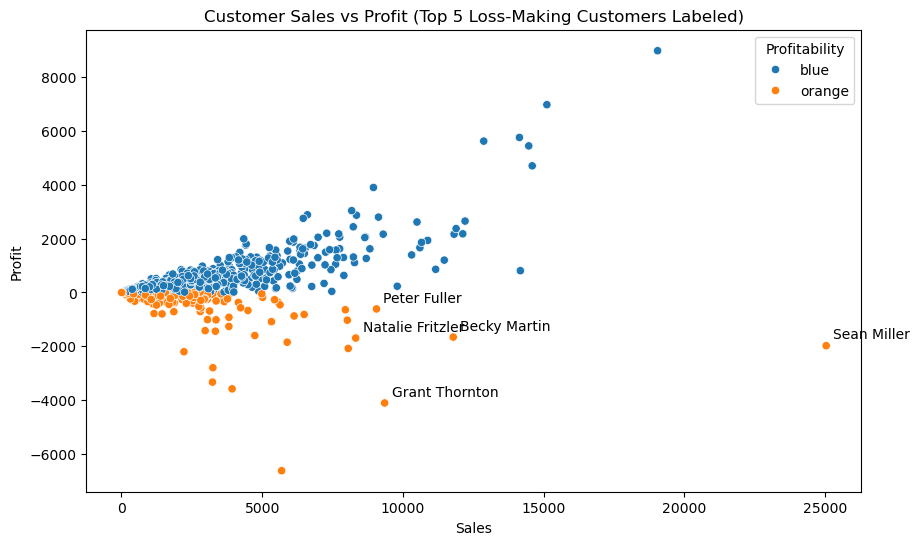


Top 5 customers with highest sales but negative profits:
                     Sales   Profit
Customer Name                      
Sean Miller       25043.05 -1980.74
Becky Martin      11789.63 -1659.96
Grant Thornton     9351.21 -4108.66
Peter Fuller       9062.86  -614.29
Natalie Fritzler   8322.83 -1695.97


In [47]:
# Create and sort dataframe by sales, then filter for negative profits
top_loss_customers = df_customer[df_customer['Profit'] < 0].sort_values('Sales', ascending=False).head(5)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_customer, hue='Profitability', x='Sales', y='Profit')

# Annotate top 5 loss-making customers
for idx, row in top_loss_customers.iterrows():
    plt.annotate(idx, 
                (row['Sales'], row['Profit']),
                xytext=(5, 5),
                textcoords='offset points')

plt.title('Customer Sales vs Profit (Top 5 Loss-Making Customers Labeled)')
plt.show()

# Display the details of these customers
print("\nTop 5 customers with highest sales but negative profits:")
print(top_loss_customers[['Sales', 'Profit']].round(2))

### Finding: We need to focus on turn our top 5 customer in sales toward profitability

## Sale by Category

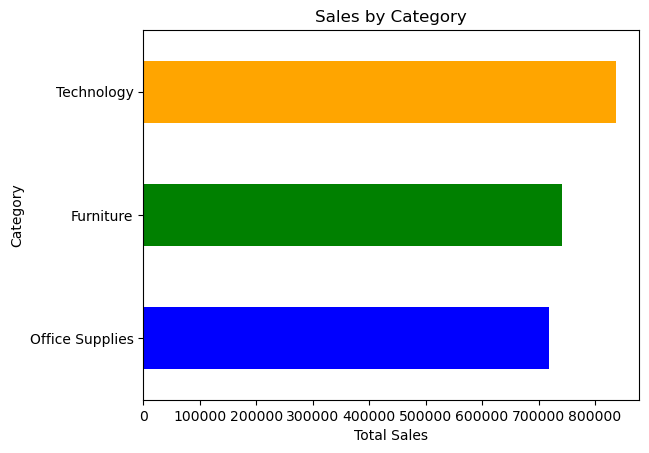

In [55]:
colors = ['blue', 'green', 'orange']
df.groupby('Category')['Sales'].sum().sort_values(ascending=True).plot.barh(color=colors)
plt.xlabel('Total Sales')  # Add x-axis label
plt.title('Sales by Category')  # Add a title for clarity
plt.show()


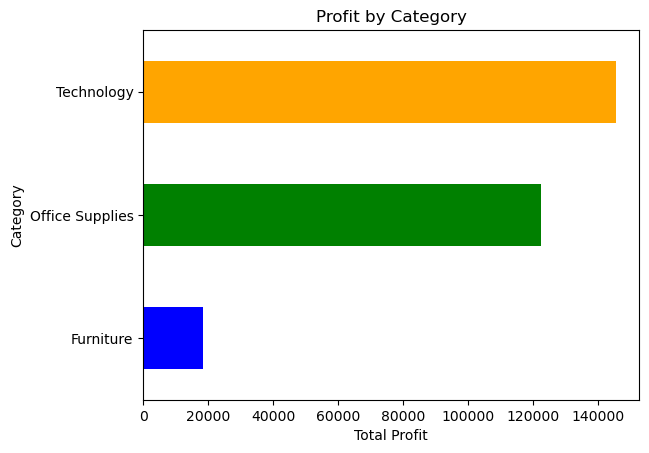

In [56]:
colors = ['blue', 'green', 'orange']
df.groupby('Category')['Profit'].sum().sort_values(ascending=True).plot.barh(color=colors);
plt.xlabel('Total Profit')  # Add x-axis label
plt.title('Profit by Category')  # Add a title for clarity
plt.show()


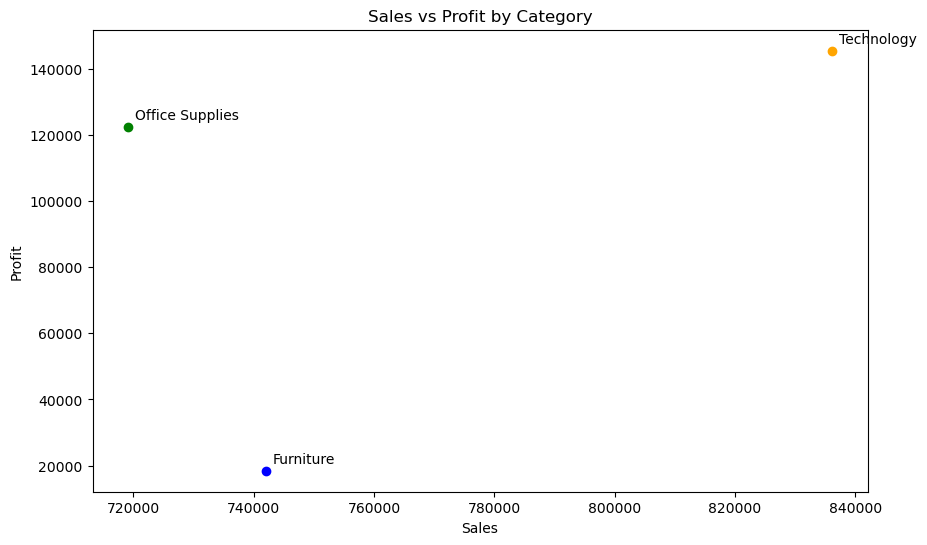

In [59]:
df_category = pd.DataFrame(df.groupby('Category')['Sales'].sum())
df_category['Profit'] = pd.DataFrame(df.groupby('Category')['Profit'].sum())

# Create color mapping
colors = {'Technology': 'orange', 'Office Supplies': 'green', 'Furniture': 'blue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
for category in df_category.index:
    plt.scatter(df_category.loc[category, 'Sales'], 
               df_category.loc[category, 'Profit'], 
               color=colors[category],
               label=category)
    plt.annotate(category, 
                (df_category.loc[category, 'Sales'], df_category.loc[category, 'Profit']),
                xytext=(5, 5), 
                textcoords='offset points')

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit by Category')
plt.show()

### Office Supplies is most profitable

## Sub-Category Analysis

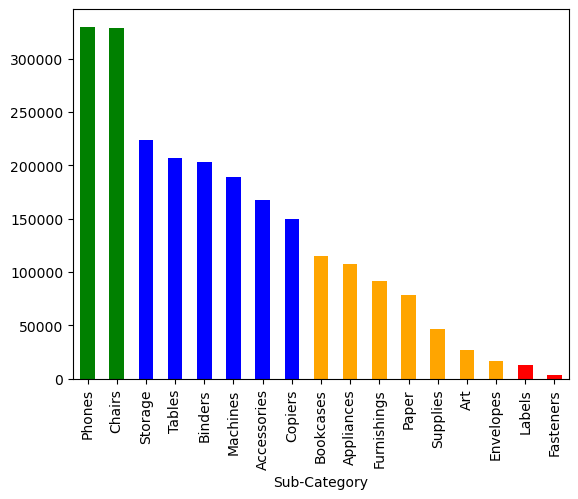

In [68]:
colors = ['green', 'green', 'blue', 'blue','blue','blue','blue','blue','orange','orange',
         'orange', 'orange', 'orange', 'orange','orange','red','red']
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors);

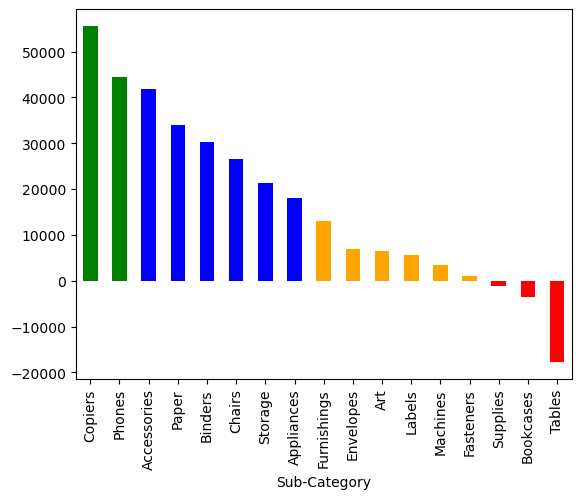

In [69]:
colors = ['green', 'green', 'blue', 'blue','blue','blue','blue','blue','orange', 'orange',
         'orange', 'orange', 'orange', 'orange', 'red','red','red']
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors);

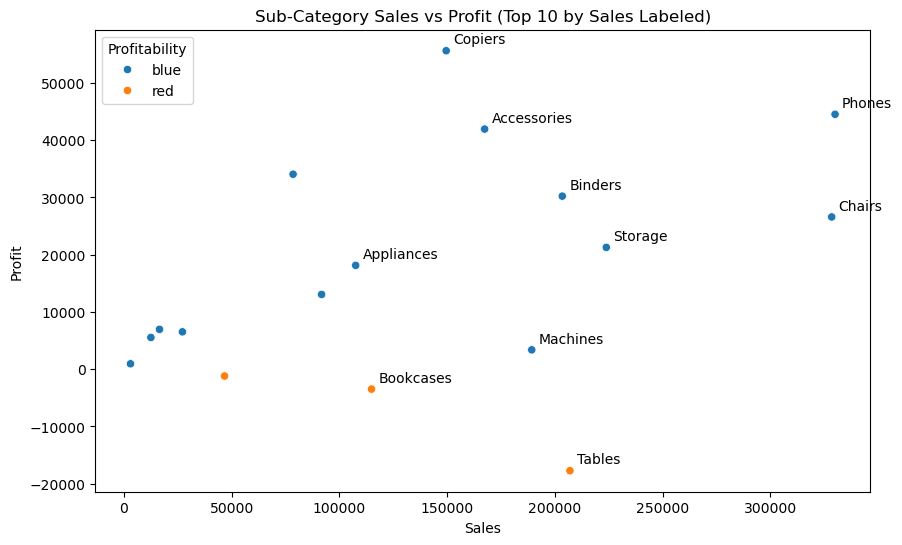

In [60]:
df_subcategory=pd.DataFrame(df.groupby('Sub-Category')['Sales'].sum())
df_subcategory['Profit']=pd.DataFrame(df.groupby('Sub-Category')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'blue'

df_subcategory.loc[:,'Profitability']=df_subcategory.loc[:,'Profit'].apply(type)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_subcategory, hue='Profitability', x='Sales', y='Profit')

# Add annotations for top 10 sub-categories by sales
top_10_subcategories = df_subcategory.nlargest(10, 'Sales')
for idx, row in top_10_subcategories.iterrows():
    plt.annotate(idx, 
                (row['Sales'], row['Profit']),
                xytext=(5, 5),
                textcoords='offset points')

plt.title('Sub-Category Sales vs Profit (Top 10 by Sales Labeled)')
plt.show()

### Finding: Bookcasea and tables have high sales but negative profitability

## Which is the best customer segment in sale and Profit?

In [31]:
df['Profitability']=df['Profit']/df['Sales']


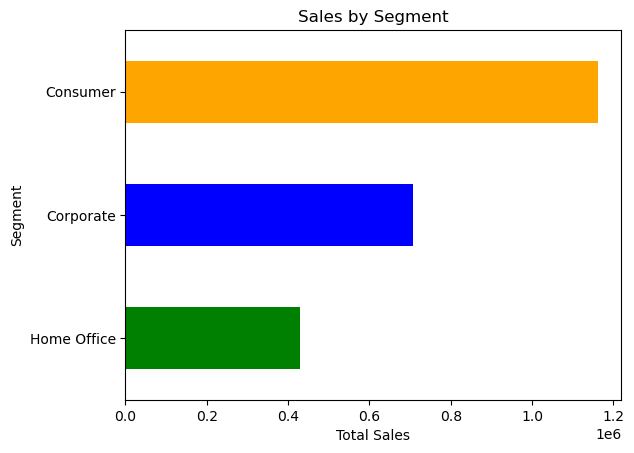

In [32]:
# Define custom colors for each segment
segment_colors = ['green', 'blue', 'orange']

# Plot the sales by segment with custom colors and x-axis label
df.groupby('Segment')['Sales'].sum().sort_values(ascending=True).plot.barh(
    color=segment_colors
)
plt.xlabel('Total Sales')  # Add x-axis label
plt.title('Sales by Segment')  # Add a title for clarity
plt.show()

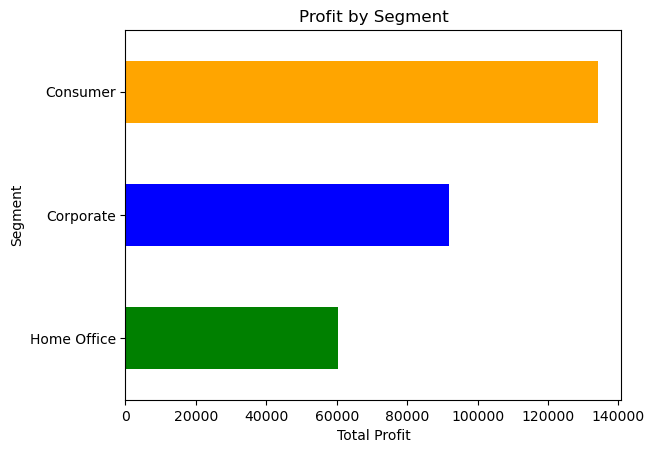

In [33]:
# Define custom colors for each segment
segment_colors = ['green', 'blue', 'orange']

# Plot the sales by segment with custom colors and x-axis label
df.groupby('Segment')['Profit'].sum().sort_values(ascending=True).plot.barh(
    color=segment_colors
)
plt.xlabel('Total Profit')  # Add x-axis label
plt.title('Profit by Segment')  # Add a title for clarity
plt.show()

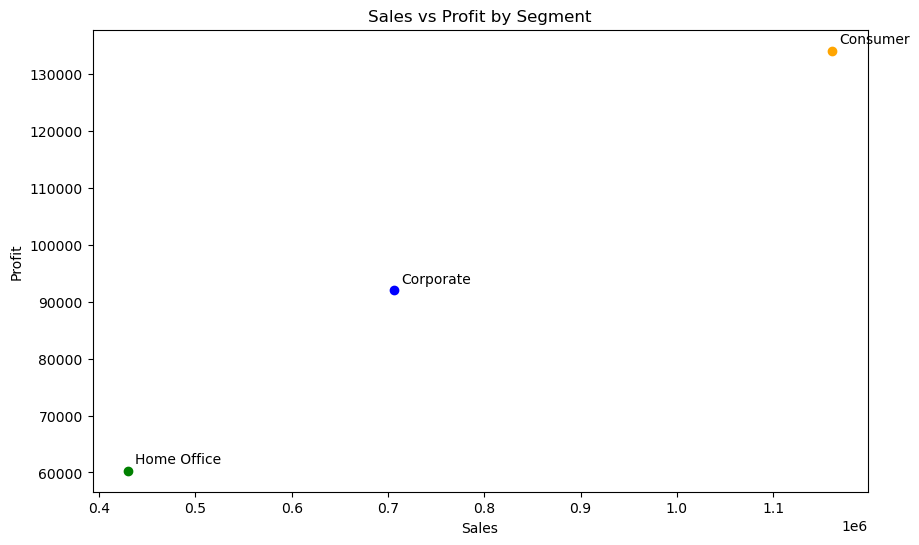

In [67]:
df_segment=pd.DataFrame(df.groupby('Segment')['Sales'].sum())
df_segment['Profit']=pd.DataFrame(df.groupby('Segment')['Profit'].sum())

# Create the scatter plot with specific colors
plt.figure(figsize=(10, 6))
colors = {'Consumer': 'orange', 'Corporate': 'blue', 'Home Office': 'green'}

for segment in df_segment.index:
    plt.scatter(df_segment.loc[segment, 'Sales'], 
               df_segment.loc[segment, 'Profit'],
               color=colors[segment],
               label=segment)
    plt.annotate(segment, 
                (df_segment.loc[segment, 'Sales'], df_segment.loc[segment, 'Profit']),
                xytext=(5, 5),
                textcoords='offset points')

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit by Segment')
plt.show()

### Finding: Prioritize Consumer and Corporate as they have the best margin and sale

# Time Series Analysis

## Sale Through Out The Year

Text(0, 0.5, 'Sales')

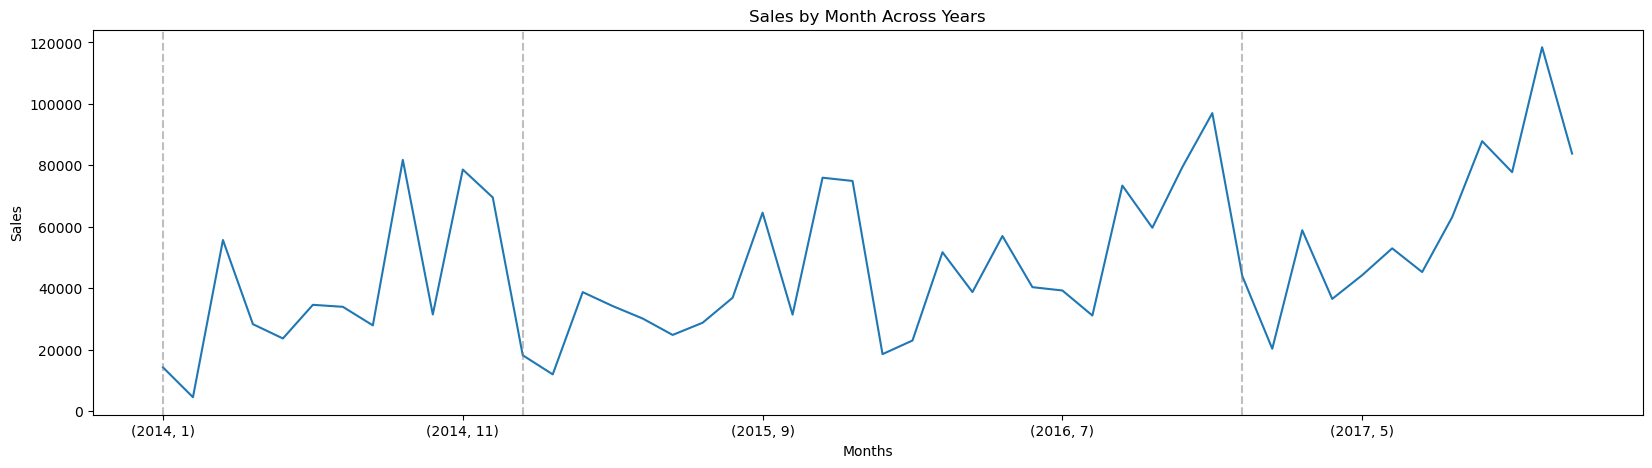

In [64]:
plt.figure(figsize=(20,5))
sales_by_month = df.groupby(['Year','Month'])['Sales'].sum()
sales_by_month.plot()

# Add vertical lines to separate years
for year in df['Year'].unique()[1:]:  # Skip first year
    plt.axvline(x=12*(year-df['Year'].min()), color='gray', linestyle='--', alpha=0.5)

plt.title('Sales by Month Across Years')
plt.xlabel('Months')
plt.ylabel('Sales')


## Profit 

Text(0, 0.5, 'Profit')

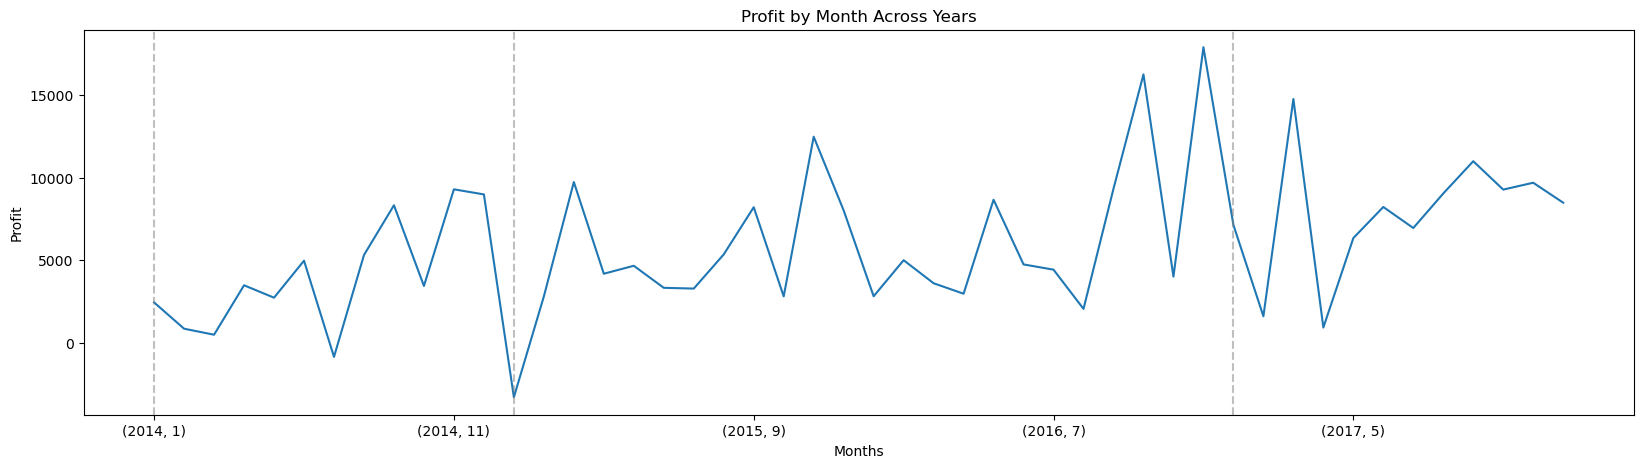

In [65]:
plt.figure(figsize=(20,5))
profit_by_month = df.groupby(['Year','Month'])['Profit'].sum()
profit_by_month.plot()

# Add vertical lines to separate years
for year in df['Year'].unique()[1:]:  # Skip first year
    plt.axvline(x=12*(year-df['Year'].min()), color='gray', linestyle='--', alpha=0.5)

plt.title('Profit by Month Across Years')
plt.xlabel('Months')
plt.ylabel('Profit')

## Quantity

Text(0, 0.5, 'Quantity')

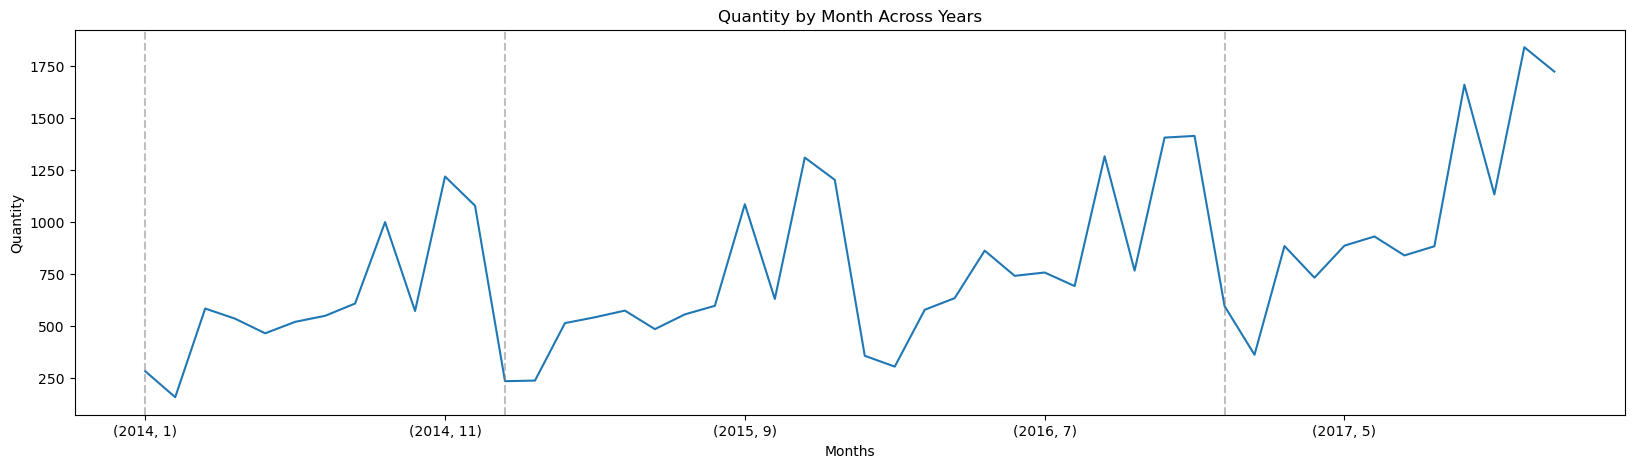

In [66]:
plt.figure(figsize=(20,5))
quantity_by_month = df.groupby(['Year','Month'])['Quantity'].sum()
quantity_by_month.plot()

# Add vertical lines to separate years
for year in df['Year'].unique()[1:]:  # Skip first year
    plt.axvline(x=12*(year-df['Year'].min()), color='gray', linestyle='--', alpha=0.5)

plt.title('Quantity by Month Across Years')
plt.xlabel('Months')
plt.ylabel('Quantity')